In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, LSTM, Reshape
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical


(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar100.load_data()
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


train_images = train_images.reshape((50000, 32, 32, 3))
test_images = test_images.reshape((10000, 32, 32, 3))
train_images, test_images = train_images / 255.0, test_images / 255.0

one_hot_train_labels = to_categorical(train_labels, 100)
one_hot_test_labels = to_categorical(test_labels, 100)

model = Sequential()
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', strides=(1, 1), input_shape=(32, 32, 3)))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(16, (3, 3), activation='relu'))
model.add(Reshape(target_shape = (16, 13*13)))
model.add(LSTM(30, input_shape = (16, 13*13), return_sequences = True))

model.add(tf.keras.layers.Flatten())

model.add(Dense(10, activation='softmax'))
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()
history = model.fit(train_images, one_hot_train_labels, epochs=5, batch_size=32)



predictions = model.predict(test_images)



# 결과 그림을 15개 출력
plt.figure(figsize=(7, 13))
for i in range(15):
    plt.subplot(5, 3, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel("Real: " + class_names[test_labels[i][0]])
    plt.title("Predicted: " + class_names[np.argmax(predictions[i])])
plt.show()



plt.figure(figsize=(12, 4))
plt.subplot(1, 1, 1)
plt.plot(history.history['loss'], 'b--', label='loss')
plt.plot(history.history['accuracy'], 'g-', label='Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()





print("\n=======================test results=============================")
labels=model.predict(test_images)
print("\n Accuracy: %.4f" % (model.evaluate(test_images, one_hot_test_labels)[1]))
print("\n================================================================")






Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 16)        4624      
                                                                 
 reshape_1 (Reshape)         (None, 16, 169)           0         
                                                                 
 lstm_1 (LSTM)               (None, 16, 30)            24000     
                                                                 
 flatten_1 (Flatten)         (None, 480)               0         
                                                      

ValueError: ignored

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 13, 13, 16)        4624      
                                                                 
 reshape_9 (Reshape)         (None, 16, 169)           0         
                                                                 
 lstm_9 (LSTM)               (None, 16, 30)            24000     
                                                                 
 flatten_9 (Flatten)         (None, 480)               0         
                                                      

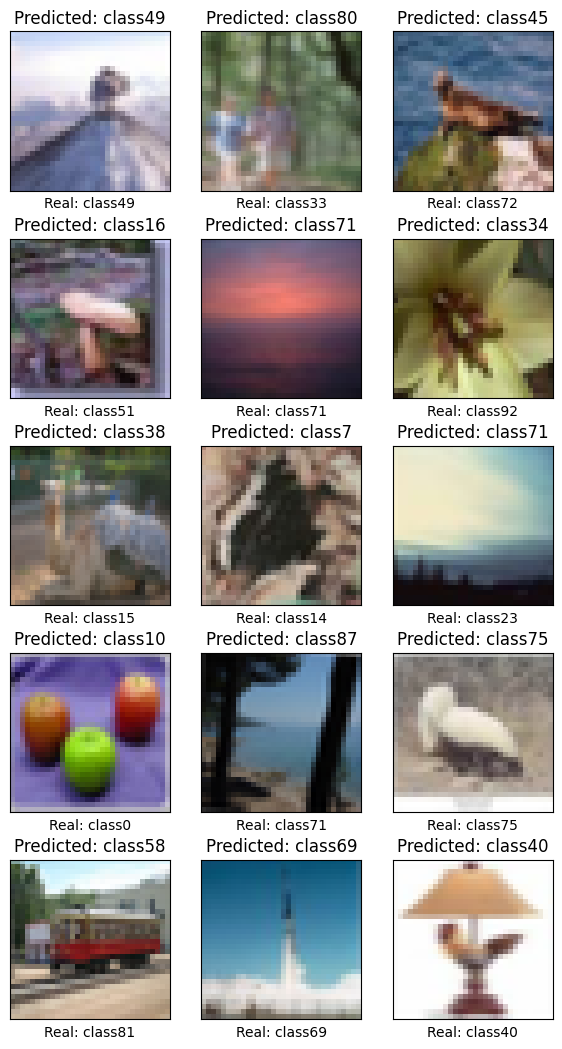

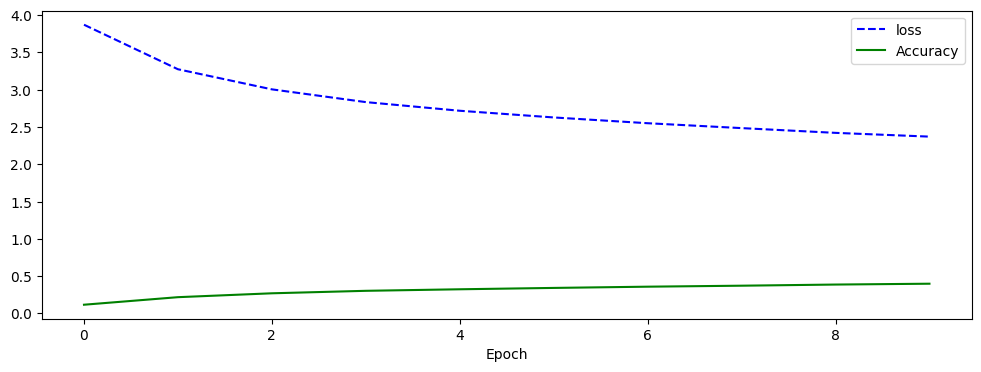

test results
313/313 [==============================] - 2s 4ms/step - loss: 2.7293 - accuracy: 0.3345
Accuracy: 0.3345


In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, LSTM, Reshape
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical


(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar100.load_data()
# class_names를 cifar100에 맞게 변경해주세요.
class_names = ['class'+str(i) for i in range(100)]


train_images = train_images.reshape((50000, 32, 32, 3))
test_images = test_images.reshape((10000, 32, 32, 3))
train_images, test_images = train_images / 255.0, test_images / 255.0

# 클래스 수를 100으로 변경해주세요.
one_hot_train_labels = to_categorical(train_labels, 100)
one_hot_test_labels = to_categorical(test_labels, 100)

model = Sequential()
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', strides=(1, 1), input_shape=(32, 32, 3)))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(16, (3, 3), activation='relu'))
model.add(Reshape(target_shape = (16, 13*13)))
model.add(LSTM(30, input_shape = (16, 13*13), return_sequences = True))

model.add(tf.keras.layers.Flatten())

# 출력 계층의 뉴런 수를 100으로 변경해주세요.
model.add(Dense(100, activation='softmax'))
model.compile(optimizer=Adam(learning_rate=0.0008), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()
history = model.fit(train_images, one_hot_train_labels, epochs=10, batch_size=32)



predictions = model.predict(test_images)



# 결과 그림을 15개 출력
plt.figure(figsize=(7, 13))
for i in range(15):
    plt.subplot(5, 3, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel("Real: " + class_names[test_labels[i][0]])
    plt.title("Predicted: " + class_names[np.argmax(predictions[i])])
plt.show()



plt.figure(figsize=(12, 4))
plt.subplot(1, 1, 1)
plt.plot(history.history['loss'], 'b--', label='loss')
plt.plot(history.history['accuracy'], 'g-', label='Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()





print("test results")
labels=model.predict(test_images)
print("Accuracy: %.4f" % (model.evaluate(test_images, one_hot_test_labels)[1]))


In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, LSTM, Reshape
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

# 데이터셋 불러오기
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar100.load_data()

# 클래스 네임 지정
class_names = ['class'+str(i) for i in range(100)]


# 정규화
train_images = train_images.reshape((50000, 32, 32, 3))
test_images = test_images.reshape((10000, 32, 32, 3))
train_images, test_images = train_images / 255.0, test_images / 255.0

# 데이터 레이블 one hot 코드 변경
one_hot_train_labels = to_categorical(train_labels, 100)
one_hot_test_labels = to_categorical(test_labels, 100)


model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', strides=(1, 1), input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu')) # Conv2D 레이어 추가
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.5)) # 과적합을 방지하기 위해 Dropout 레이어 추가
model.add(Flatten())
model.add(Reshape((-1, 128))) # Reshape 레이어 추가
model.add(LSTM(128, return_sequences=True))
model.add(Flatten()) # LSTM 레이어 후에 추가
model.add(Dense(256, activation='relu'))
model.add(Dense(100, activation='softmax'))


model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

history = model.fit(train_images, one_hot_train_labels, epochs=5, batch_size=32)

predictions = model.predict(test_images)

# 그림 출력

plt.figure(figsize=(7, 13))
for i in range(15):
    plt.subplot(5, 3, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel("Real: " + class_names[test_labels[i][0]])
    plt.title("Predicted: " + class_names[np.argmax(predictions[i])])
plt.show()

# 학습 과정 시각화
plt.figure(figsize=(12, 4))
plt.subplot(1, 1, 1)
plt.plot(history.history['loss'], 'b--', label='loss')
plt.plot(history.history['accuracy'], 'g-', label='Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

print("test results")
print("Accuracy: %.4f" % (model.evaluate(test_images, one_hot_test_labels)[1]))


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 15, 15, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 6, 6, 64)          0         
 ng2D)                                                           
                                                                 
 dropout_5 (Dropout)         (None, 6, 6, 64)          0         
                                                                 
 flatten_6 (Flatten)         (None, 2304)             

KeyboardInterrupt: ignored

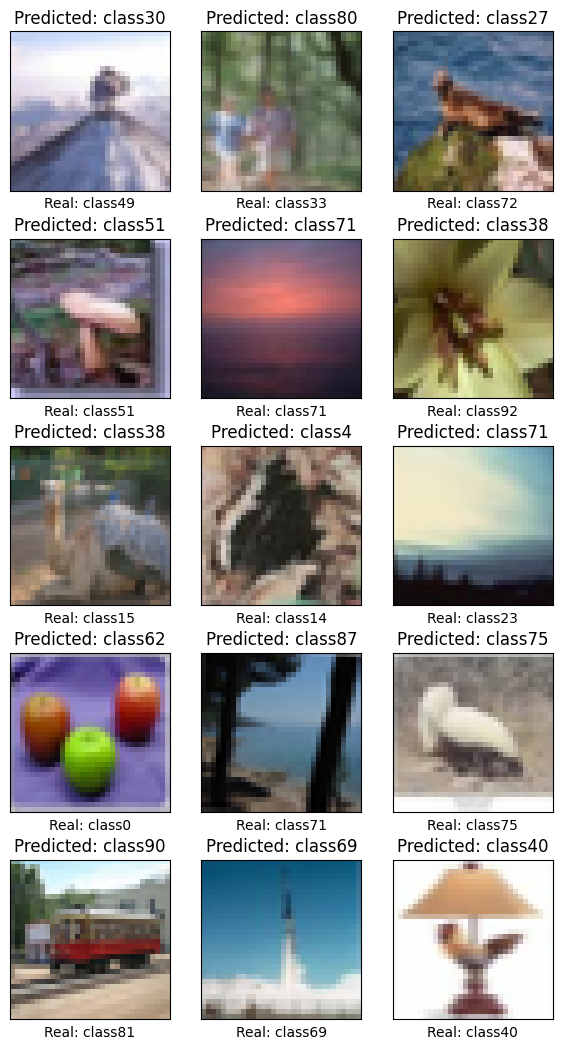

test results
313/313 [==============================] - 7s 24ms/step - loss: 2.3964 - accuracy: 0.3871
Accuracy: 0.3871


In [8]:

plt.figure(figsize=(7, 13))
for i in range(15):
    plt.subplot(5, 3, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel("Real: " + class_names[test_labels[i][0]])
    plt.title("Predicted: " + class_names[np.argmax(predictions[i])])
plt.show()

print("test results")
print("Accuracy: %.4f" % (model.evaluate(test_images, one_hot_test_labels)[1]))